In [11]:
import os
import shutil
from pathlib import Path
from dotenv import load_dotenv
import dataset  # Make sure this is the correct module name
import tifffile as tiff

load_dotenv()

data_path = Path(os.getenv("prepare_dataset_folder"))
processed_path = Path(os.getenv("processed_images_folder"))
split = "train"  # Adjust as needed for 'val' or 'test'

# Ensure the processed data folder exists
processed_path.mkdir(parents=True, exist_ok=True)

# Instantiate the dataset
forest_sat_dataset = dataset.MineSATDataset(split=split, data_path=data_path)


# Iterate over all dataset indices
for index in range(len(forest_sat_dataset)):
    # Get the filepaths for the current index
    filepath = forest_sat_dataset.filepaths[index]
    
    # Extract the original directory name
    original_dir_name = Path(filepath).name
    
    # Get the processed images
    images_dict = forest_sat_dataset.get_transformed_images(index)  # Using the new method
    
    # Create a new directory path for the processed images
    processed_dir_path = processed_path / original_dir_name
    processed_dir_path.mkdir(parents=True, exist_ok=True)
    
    # Save each processed image in the new directory
    for img_type, image in images_dict.items():
        # Skip saving the mask if you only want the indices and RGB images
        if img_type == "Mask":
            continue

        # Define the filename, maintaining the original directory name
        filename = f"{img_type}.tif"
        # Define the full path
        filepath = processed_dir_path / filename
        # Save the image
        tiff.imwrite(filepath, image) 


File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_100/B02.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_101/B07.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_102/B07.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_103/B02.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_104/B07.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_105/B07.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prep

/Users/lilllmeng/PycharmProjects/Capstone/mine_seg_sat/dataset.py:603: RuntimeWarning: invalid value encountered in divide
  NDVI = (B08 - B04) / (B08 + B04)
/Users/lilllmeng/PycharmProjects/Capstone/mine_seg_sat/dataset.py:606: RuntimeWarning: invalid value encountered in divide
  NDBI = (B11 - B08) / (B11 + B08)
/Users/lilllmeng/PycharmProjects/Capstone/mine_seg_sat/dataset.py:609: RuntimeWarning: invalid value encountered in divide
  NDWI = (B08 - B12) / (B08 + B12)
/Users/lilllmeng/PycharmProjects/Capstone/mine_seg_sat/dataset.py:619: RuntimeWarning: invalid value encountered in divide
  NBR = (B08 - B07_rescaled) / (B08 + B07_rescaled)
/var/folders/zk/gdbl783j40ldg_nb6j2467rh0000gn/T/ipykernel_22895/1040873900.py:55: RuntimeWarning: invalid value encountered in cast
  tiff.imwrite(tif_filepath.as_posix(), image.astype(np.uint8))


File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_107/B07.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_108/B07.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_109/B07.tif'


/Users/lilllmeng/PycharmProjects/Capstone/mine_seg_sat/dataset.py:248: RuntimeWarning: invalid value encountered in divide
  return band / np.percentile(band, percentile)


File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_110/B07.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_111/B07.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_112/B07.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_113/B07.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_114/B07.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_115/B07.tif'
File not found: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prep

/Users/lilllmeng/PycharmProjects/Capstone/mine_seg_sat/dataset.py:248: RuntimeWarning: divide by zero encountered in divide
  return band / np.percentile(band, percentile)
/Users/lilllmeng/PycharmProjects/Capstone/mine_seg_sat/dataset.py:603: RuntimeWarning: invalid value encountered in subtract
  NDVI = (B08 - B04) / (B08 + B04)
/Users/lilllmeng/PycharmProjects/Capstone/mine_seg_sat/dataset.py:606: RuntimeWarning: invalid value encountered in subtract
  NDBI = (B11 - B08) / (B11 + B08)
/Users/lilllmeng/PycharmProjects/Capstone/mine_seg_sat/dataset.py:609: RuntimeWarning: invalid value encountered in subtract
  NDWI = (B08 - B12) / (B08 + B12)


In [1]:

import numpy as np
import csv

def save_numerical_values_to_csv(numerical_values, csv_filename):
    # Flatten the numerical values and prepare them for writing to a CSV file
    flattened_data = {}
    for key, value in numerical_values.items():
        if isinstance(value, np.ndarray):
            flattened_data[key] = value.flatten()
        else:
            flattened_data[key] = value

    # Find the longest array in the flattened data
    max_length = max(len(v) for v in flattened_data.values())

    # Ensure all arrays are the same length, filling with NaN where necessary
    for key in flattened_data:
        length = len(flattened_data[key])
        if length < max_length:
            flattened_data[key] = np.pad(flattened_data[key], (0, max_length - length), constant_values=np.nan)

    # Write to CSV
    with open(csv_filename, 'w', newline='') as csvfile:
        fieldnames = list(flattened_data.keys())
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for i in range(max_length):
            row = {key: flattened_data[key][i] for key in fieldnames}
            writer.writerow(row)


Parent folder name for index 34: image_directory_20230813_1089


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


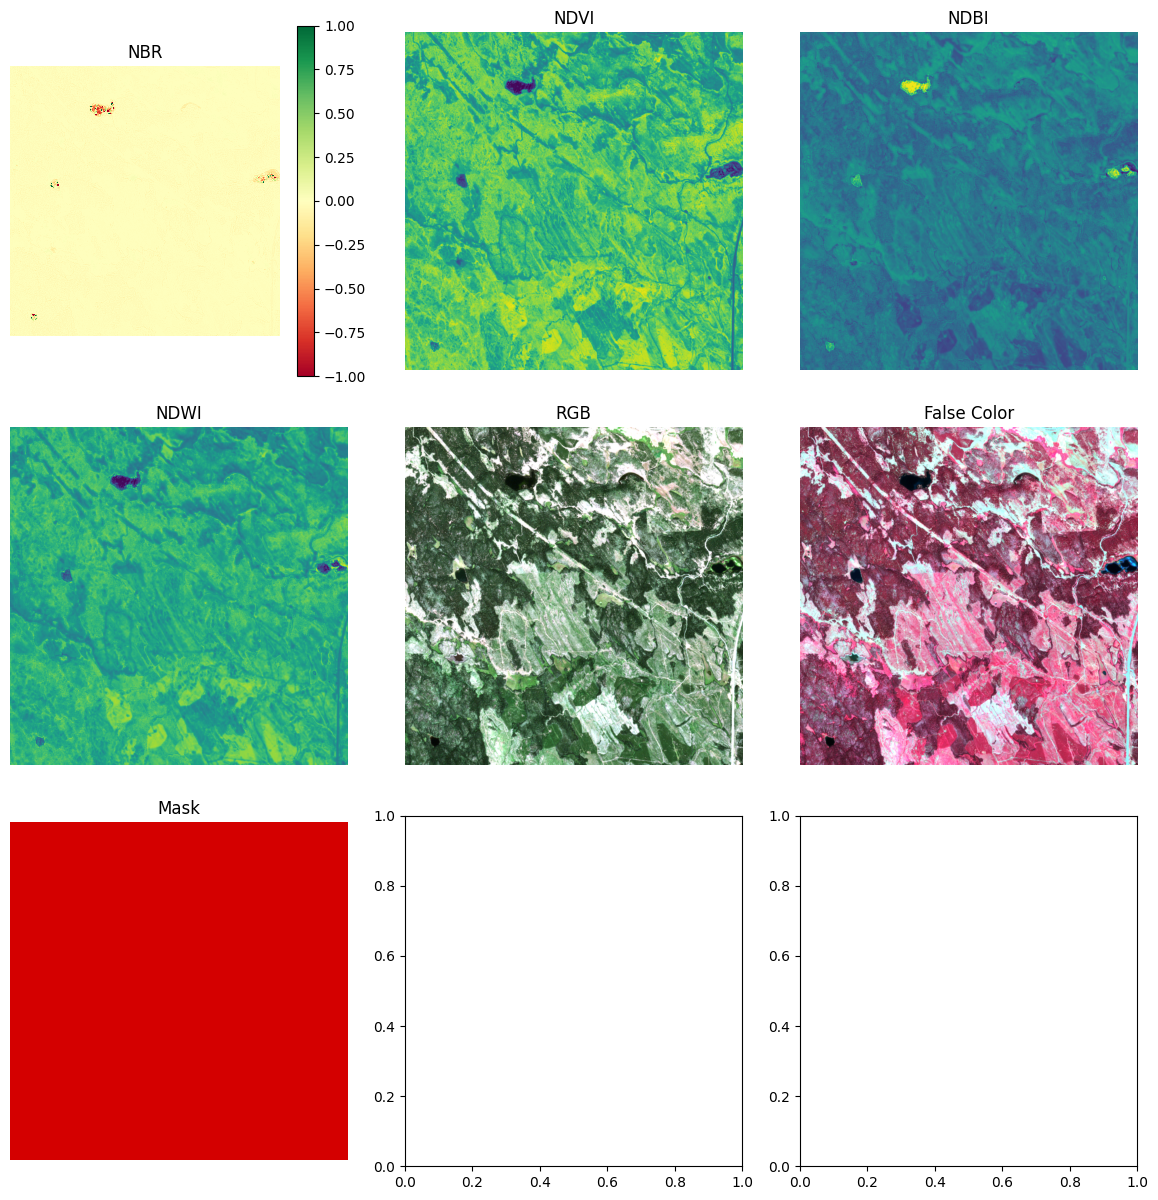

In [8]:
import dataset
from pathlib import Path
from dotenv import load_dotenv
import os

load_dotenv()

data_path = Path(os.getenv("prepare_dataset_folder"))
split = "train"  # or 'val' or 'test', depending on your dataset_splits.csv

# Instantiate the dataset
forest_sat_dataset = dataset.MineSATDataset(split=split, data_path=data_path)

index = 52
full_path = forest_sat_dataset.filepaths[index]
parent_folder_name = Path(full_path).parent.name
print(f"Parent folder name for index {index}: {parent_folder_name}")
# Display the transformed images including NBR and NDVI
forest_sat_dataset.display_transformed_images(index)

In [14]:
numerical_values = forest_sat_dataset.get_numerical_values(index)
print(numerical_values)
save_numerical_values_to_csv(numerical_values, "../data_csv/data.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/lilllmeng/PycharmProjects/Capstone/prepare_dataset/image_directory_20230813_100/B07.tif'